# plotting functions of figure 3 in the manuscript
In this figure we demonstrate the ability to change the SNR of the particles to more accurately approach experimental data.


In [1]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# roodmus
from roodmus.analysis.utils import load_data

In [ ]:
# functions

## panel A
plotting the estimated CTF for 3 different electron dose levels

## panel A
precision and recall of particle picking with topaz for different electron dose levels

In [2]:
project_dir = "/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison"
figures_dir = os.path.join(project_dir, "figures")
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True # prints out progress statements
ignore_missing_files = True # if .mrc files are missing, the analysis will still be performed
enable_tqdm = True # enables tqdm progress bars

data = {
    0: {
        "exposure": 45,
        "LoG": "job004",
        "Class2D": "job005",
        "topaz": "job010",
        "homogeneous": "job016"
    },
    1: {
        "exposure": 35,
        "LoG": "job037",
        "Class2D": "job038",
        "topaz": "job042",
        "homogeneous": "job048"
    },
    2: {
        "exposure": 25,
        "LoG": "job054",
        "Class2D": "job055",
        "topaz": "job059",
        "homogeneous": "job065"
    },
    3: {
        "exposure": 15,
        "LoG": "job071",
        "Class2D": "job072",
        "topaz": "job076",
        "homogeneous": "job082"
    },
    4: {
        "exposure": 5,
        "LoG": "job088",
        "Class2D": "job089",
        "topaz": None,
        "homogeneous": None
    },
    5: {
        "exposure": 10,
        "LoG": "job093",
        "Class2D": "job094",
        "topaz": None,
        "homogeneous": None
    },
    6: {
        "exposure": 12,
        "LoG": "job098",
        "Class2D": "job099",
        "topaz": None,
        "homogeneous": None
    },
        7: {
        "exposure": 8,
        "LoG": "job114",
        "Class2D": "job115",
        "topaz": None,
        "homogeneous": None,
    },
}

for key, item in data.items():
    exposure = f"{item['exposure']}".zfill(2)
    config_dir = os.path.join(project_dir, f"mrc_epa_{exposure}")
    print(config_dir)
    meta_files = [
        os.path.join(project_dir, "Extract", item["LoG"], "particles.star"),
        # os.path.join(project_dir, "Class2D", item["Class2D"], "run_it025_data.star"),
    ]
    jobtypes = {
        os.path.join(project_dir, "Extract", item["LoG"], "particles.star"): "LoG",
        os.path.join(project_dir, "Class2D", item["Class2D"], "run_it025_data.star"): "Class2D",
    }
    if item["topaz"]:
        meta_files.append(os.path.join(project_dir, "Extract", item["topaz"], "particles.star"))
        jobtypes[os.path.join(project_dir, "Extract", item["topaz"], "particles.star")] = "topaz"
    if item["homogeneous"]:
        meta_files.append(os.path.join(project_dir, "Refine3D", item["homogeneous"], "run_data.star"))
        jobtypes[os.path.join(project_dir, "Refine3D", item["homogeneous"], "run_data.star")] = "homogeneous"

    for i, meta_file in enumerate(meta_files):
        if i == 0:
            analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, enable_tqdm=enable_tqdm, ignore_missing_files=ignore_missing_files) # creates the class
        else:
            analysis.add_data(meta_file, config_dir, verbose=verbose) # updates the class with the next metadata file
    
    df_picked = pd.DataFrame(analysis.results_picking)
    df_truth = pd.DataFrame(analysis.results_truth)

    # compute precision and recall
    df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)

    # add a column to the picked data frame that indicates exposure
    df_picked["exposure"] = item["exposure"]
    df_precision["exposure"] = item["exposure"]

    df_overlap = analysis.compute_overlap(df_picked, df_truth, verbose=verbose)

    # add a column to the overlap data frame that indicates exposure
    df_overlap["exposure"] = item["exposure"]

    if key == 0:
        df_precision_all = df_precision
        df_picked_all = df_picked
        df_overlap_all = df_overlap
        df_truth_all = df_truth
    else:
        df_precision_all = pd.concat([df_precision_all, df_precision])
        df_picked_all = pd.concat([df_picked_all, df_picked])
        df_overlap_all = pd.concat([df_overlap_all, df_overlap])
        df_truth_all = pd.concat([df_truth_all, df_truth])

jobtypes_all = {}
for value in data.values():
    jobtypes_all[value["LoG"]] = "LoG"
    # jobtypes_all[value["Class2D"]] = "Class2D"
    if value["topaz"]:
        jobtypes_all[value["topaz"]] = "topaz"
    if value["homogeneous"]:
        jobtypes_all[value["homogeneous"]] = "homogeneous"
df_precision_all["job"] = df_precision_all["metadata_filename"].apply(lambda x: x.split("/")[-2])
df_precision_all["jobtype"] = df_precision_all["job"].map(jobtypes_all)
df_picked_all["job"] = df_picked_all["metadata_filename"].apply(lambda x: x.split("/")[-2])
df_picked_all["jobtype"] = df_picked_all["job"].map(jobtypes_all)

/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_45
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job004/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job004/particles.star. determined file type: star


Dictionaries now contain 35912 reconstructed particles
added 35912 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job004/particles.star


loading truth data: 100%|██████████| 100/100 [00:26<00:00,  3.73it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 35912 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_45
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job010/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job010/particles.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 108600 reconstructed particles
added 72688 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job010/particles.star
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job016/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job016/run_data.star. determined file type: star
checking if u

computing precision: 100%|██████████| 300/300 [00:43<00:00,  6.86it/s, precision=0.919, recall=0.966, multiplicity=0.973]


time taken to compute precision: 44.104310750961304


computing overlap: 100%|██████████| 300/300 [00:01<00:00, 161.39it/s, neighbours_truth=252, neighbours_picked=418]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_35
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job037/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job037/particles.star. determined file type: star


Dictionaries now contain 35948 reconstructed particles
added 35948 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job037/particles.star


loading truth data: 100%|██████████| 100/100 [00:24<00:00,  4.10it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 35948 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_35
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job042/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job042/particles.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 105057 reconstructed particles
added 69109 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job042/particles.star
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job048/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job048/run_data.star. determined file type: star
checking if u

computing precision: 100%|██████████| 300/300 [00:42<00:00,  7.01it/s, precision=0.981, recall=0.893, multiplicity=0.9]  


time taken to compute precision: 43.030932664871216


computing overlap: 100%|██████████| 300/300 [00:01<00:00, 161.07it/s, neighbours_truth=253, neighbours_picked=344]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_25
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job054/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job054/particles.star. determined file type: star


Dictionaries now contain 36250 reconstructed particles
added 36250 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job054/particles.star


loading truth data: 100%|██████████| 100/100 [00:25<00:00,  3.93it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36250 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_25
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job059/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job059/particles.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 115395 reconstructed particles
added 79145 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job059/particles.star
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job065/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job065/run_data.star. determined file type: star
checking if u

computing precision: 100%|██████████| 300/300 [00:44<00:00,  6.73it/s, precision=0.963, recall=0.897, multiplicity=0.91] 


time taken to compute precision: 44.86979651451111


computing overlap: 100%|██████████| 300/300 [00:01<00:00, 168.90it/s, neighbours_truth=224, neighbours_picked=340]   


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_15
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job071/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job071/particles.star. determined file type: star


Dictionaries now contain 36346 reconstructed particles
added 36346 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job071/particles.star


loading truth data: 100%|██████████| 100/100 [00:25<00:00,  3.99it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36346 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_15
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job076/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job076/particles.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 95714 reconstructed particles
added 59368 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job076/particles.star
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job082/run_data.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Refine3D/job082/run_data.star. determined file type: star
checking if ug

computing precision: 100%|██████████| 300/300 [00:35<00:00,  8.37it/s, precision=0.97, recall=0.655, multiplicity=0.663] 


time taken to compute precision: 36.15497326850891


computing overlap: 100%|██████████| 300/300 [00:01<00:00, 157.82it/s, neighbours_truth=227, neighbours_picked=250]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_05
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job088/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job088/particles.star. determined file type: star


Dictionaries now contain 36201 reconstructed particles
added 36201 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job088/particles.star


loading truth data: 100%|██████████| 100/100 [00:24<00:00,  4.06it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36201 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_05
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 100
Number of micgrographs: 100
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 100/100 [00:10<00:00,  9.23it/s, precision=0.426, recall=0.544, multiplicity=0.563]


time taken to compute precision: 10.956470727920532


computing overlap: 100%|██████████| 100/100 [00:00<00:00, 191.35it/s, neighbours_truth=213, neighbours_picked=406]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_10
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job093/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job093/particles.star. determined file type: star


Dictionaries now contain 36415 reconstructed particles
added 36415 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job093/particles.star


loading truth data: 100%|██████████| 100/100 [00:23<00:00,  4.18it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36415 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_10
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 100
Number of micgrographs: 100
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 100/100 [00:11<00:00,  8.52it/s, precision=0.53, recall=0.681, multiplicity=0.7]  


time taken to compute precision: 11.864143133163452


computing overlap: 100%|██████████| 100/100 [00:00<00:00, 183.41it/s, neighbours_truth=258, neighbours_picked=414]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_12
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job098/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job098/particles.star. determined file type: star


Dictionaries now contain 36447 reconstructed particles
added 36447 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job098/particles.star


loading truth data: 100%|██████████| 100/100 [00:23<00:00,  4.18it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36447 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_12
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 100
Number of micgrographs: 100
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 100/100 [00:11<00:00,  8.92it/s, precision=0.508, recall=0.637, multiplicity=0.657]


time taken to compute precision: 11.246188879013062


computing overlap: 100%|██████████| 100/100 [00:00<00:00, 185.82it/s, neighbours_truth=243, neighbours_picked=414]


/home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_08
loading metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job114/particles.star...
loaded metadata from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job114/particles.star. determined file type: star


Dictionaries now contain 36361 reconstructed particles
added 36361 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/Extract/job114/particles.star


loading truth data: 100%|██████████| 100/100 [00:24<00:00,  4.08it/s, micrograph=000099.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 36361 particles and 30000 true particles
Added 30000 particles from /home/mjoosten1/projects/roodmus/data/20231017_EMPIAR_SNR_comparison/mrc_epa_08
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 100
Number of micgrographs: 100
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 100/100 [00:11<00:00,  8.72it/s, precision=0.469, recall=0.609, multiplicity=0.63] 


time taken to compute precision: 11.500718355178833


computing overlap: 100%|██████████| 100/100 [00:00<00:00, 152.60it/s, neighbours_truth=248, neighbours_picked=422]


In [ ]:
# sort df_precision_all by exposure
df_precision_LoG = df_precision_all.groupby("jobtype").get_group("LoG")

fig, ax = plt.subplots(figsize=(7, 3.5))
# create stripplot for precision per exposure, with different columns for different metadata files
sns.stripplot(x="exposure", y="recall", hue="defocus", data=df_precision_LoG, ax=ax, jitter=0.1, dodge=False, alpha=0.5, legend=False, palette="RdYlBu")
sns.boxplot(x="exposure", y="recall", hue="exposure", data=df_precision_LoG, ax=ax, dodge=False, palette="Blues", legend=False)

ax.set_xlabel("electron dose (e-/$\AA^2$)")
sm = plt.cm.ScalarMappable(
    cmap="RdYlBu",
    norm=plt.Normalize(
        vmin=df_precision["defocus"].min(),
        vmax=df_precision["defocus"].max(),
    ),
)
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("defocus (Å)", rotation=270, labelpad=20, fontsize=12)

fig.savefig(os.path.join(figures_dir, "recall_vs_exposure.pdf"), bbox_inches="tight")



In [ ]:
df_precision_LoG = df_precision_all.groupby("jobtype").get_group("LoG")

fig, ax = plt.subplots(figsize=(7, 3.5))
# create stripplot for precision per exposure, with different columns for different metadata files
sns.stripplot(x="exposure", y="precision", hue="defocus", data=df_precision_LoG, ax=ax, jitter=0.1, dodge=False, alpha=0.5, legend=False, palette="RdYlBu")
sns.boxplot(x="exposure", y="precision", hue="exposure", data=df_precision_LoG, ax=ax, dodge=False, palette="Blues", legend=False)

ax.set_xlabel("electron dose (e-/$\AA^2$)")
sm = plt.cm.ScalarMappable(
    cmap="RdYlBu",
    norm=plt.Normalize(
        vmin=df_precision["defocus"].min(),
        vmax=df_precision["defocus"].max(),
    ),
)
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("defocus (Å)", rotation=270, labelpad=20, fontsize=12)

fig.savefig(os.path.join(figures_dir, "precision_vs_exposure.pdf"), bbox_inches="tight")

## panel B
Plot of the average distance between a picked particle and the closest truth particle. This acts as a measurement of the accuracy of the particle picking. The data gets filtered to only include TP particles (i.e. particles that are within 1 particle radius of a truth particle). Because of this, the increase in average distance cannot be explained by more FP particle picks, and only by less precise picking of good particles.

In [ ]:
# plot the average distance to the closest particle as a function of exposure
df_picked_all["job"] = df_picked_all["metadata_filename"].apply(lambda x: x.split("/")[-2])
df_picked_all["jobtype"] = df_picked_all["job"].map(jobtypes_all)
df_picked_LoG = df_picked_all[df_picked_all["jobtype"] == "LoG"]
df_picked_LoG_TP = df_picked_LoG.groupby("TP").get_group(True)
fig, ax = plt.subplots(figsize=(3.5, 3.5))
# sns.violinplot(x="exposure", y="closest_dist", data=df_picked_LoG_TP, ax=ax, inner="quartile", palette="Blues", legend=False)
sns.boxplot(x="exposure", y="closest_dist", hue="exposure", data=df_picked_LoG_TP, ax=ax, palette="Blues", legend=False)
# sns.stripplot(x="exposure", y="closest_dist", data=df_picked_LoG_TP, ax=ax, jitter=0.1, dodge=True, alpha=0.5, color="k")
ax.set_xlabel("Exposure (e-/$\AA^2$)")
ax.set_ylabel("Distance to closest particle ($\AA$)")

fig.savefig(os.path.join(figures_dir, "distance_to_closest_particle_vs_exposure.pdf"), bbox_inches="tight")

## panel D
plot of the CTF estimation

In [3]:
from roodmus.analysis.plot_ctf import plot_CTF
import mrcfile
from scipy import interpolate

In [114]:
def _relativistic_lambda(voltage):
    # returns the relativistic wavelength in Angstrom
    # voltage should be in volts
    return 12.2643247 / np.sqrt(voltage * (1 + voltage * 0.978466e-6))

def _simulate_CTF_curve(defocus, amp, Cs, B, voltage, k):
    wavelength = _relativistic_lambda(voltage)
    gamma = (-np.pi / 2) * Cs * np.power(wavelength, 3) * np.power(
        k, 4
    ) + np.pi * wavelength * defocus * np.power(k, 2)
    CTF = -1 * np.sin(amp + gamma)
    if B != 0:
        CTF *= np.exp(-B * k**2)

    return CTF

def plot_CTF(
    df_picked,
    metadata_filename,
    df_truth,
    mrc_dir,
    ugraph_index=0,
    amp=0.1,
    Cs=2.7,
    Bfac=0,
    kV=300,
):
    # group the picked data frame
    if metadata_filename is not None:
        if isinstance(metadata_filename, list):
            metadata_filename = metadata_filename[0]
        df_picked = df_picked.groupby("metadata_filename").get_group(
            metadata_filename
        )

    # get the micrograph name
    ugraph_filename = np.unique(df_picked["ugraph_filename"])[ugraph_index]
    print(f"plotted index {ugraph_index}; micrograph: {ugraph_filename}")

    ugraph_path = os.path.join(mrc_dir, ugraph_filename)
    ugraph = mrcfile.open(ugraph_path).data[0, :, :]
    ugraph_ft = np.fft.fftshift(np.fft.fft2(ugraph))
    magnitude_spectrum = 20 * np.log(np.abs(ugraph_ft))
    print(f"micrograph shape: {ugraph.shape}")
    print(f"magnitude_spectrum shape: {magnitude_spectrum.shape}")

    # for contrast, only plot the middle 80% of the spectrum
    vmin = np.nanpercentile(magnitude_spectrum, 10)
    vmax = np.nanpercentile(magnitude_spectrum, 90)

    # get the CTF values for the micrograph from the dataframe
    data_ugraph = df_picked.groupby("ugraph_filename").get_group(
        ugraph_filename
    )
    defocusU = np.array(data_ugraph["defocusU"])[
        0
    ]  # assume all particles have the same defocusU
    print(f"estimated defocus: {defocusU} Å")

    defocus_true = np.array(df_truth.groupby("ugraph_filename").get_group(
        ugraph_filename
    )["defocus"])[0]
    print(f"true defocus: {defocus_true} Å")

    # change all the units to Angstrom
    Cs *= 1e7 # mm to Angstrom
    kV *= 1e3 # kV to V

    # extract the frequency values from the micrograph
    rows, cols = ugraph.shape
    freq_rows = np.fft.rfftfreq(rows, d=1)
    freq_cols = np.fft.rfftfreq(cols, d=1)
    mesh_freq_cols, mesh_freq_rows = np.meshgrid(freq_cols, freq_rows)
    mesh_freq = np.sqrt(mesh_freq_cols**2 + mesh_freq_rows**2)
    ctf_estimated = _simulate_CTF_curve(
        -defocusU, amp, Cs, Bfac, kV, mesh_freq
    )
    # make the min and max of the estimated ctf equal to the min and max of the micrograph
    ctf_estimated = (ctf_estimated - ctf_estimated.min()) / (ctf_estimated.max() - ctf_estimated.min())
    ctf_estimated = ctf_estimated * (vmax - vmin) + vmin
    ctf_estimated_padded = np.ones_like(ugraph_ft, dtype=ctf_estimated.dtype)*np.nan
    # add the estimated CTF to the bottom right quadrant
    magnitude_spectrum[(rows // 2)-1:, (cols // 2)-1:] = ctf_estimated
    print(ctf_estimated_padded.shape)
    print(ctf_estimated_padded.dtype)


    # ctf_true = _simulate_CTF_curve(
    #     defocus_true, amp, Cs, Bfac, kV, mesh_freq
    # )
    # # mask out all but the second quadrant
    # ctf_true[mesh_freq_cols > 0] = np.nan
    # ctf_true[mesh_freq_rows < 0] = np.nan
    
    # plot the power spectrum
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(magnitude_spectrum, cmap="gray", vmin=vmin, vmax=vmax)
    # ax.imshow(ctf_estimated_padded, cmap="gray", alpha=1.0, vmin=-1, vmax=1)
    # ax.imshow(ctf_true, cmap="gray", alpha=1.0, vmin=-1, vmax=1)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    return fig, ax


plotted index 0; micrograph: 000000.mrc
micrograph shape: (4000, 4000)
magnitude_spectrum shape: (4000, 4000)
estimated defocus: 4730.899902 Å
true defocus: -4774.323342152319 Å
(4000, 4000)
float64


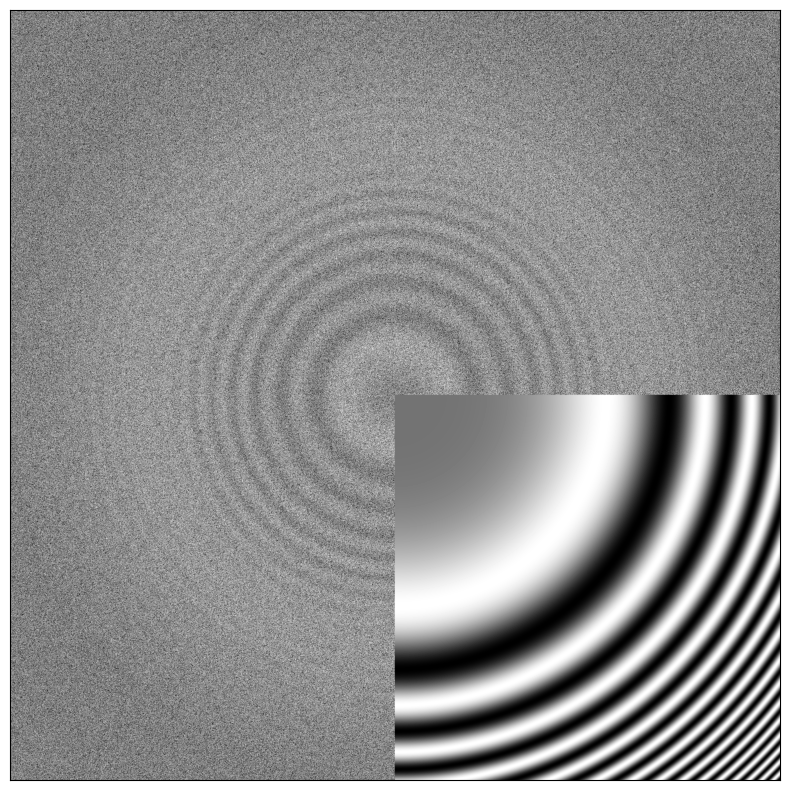

In [115]:

df_picked_filtered = df_picked_all.groupby(["exposure", "jobtype"]).get_group((45, "LoG"))
# df_truth_filtered = df_truth_all.groupby("exposure").get_group(45)
fig, ax = plot_CTF(
    df_picked_filtered,
    None,
    df_truth_all,
    os.path.join(project_dir, "mrc_epa_45"),
    ugraph_index=0,
    amp=0.1,
    Cs=2.7,
    Bfac=0,
    kV=300,
)



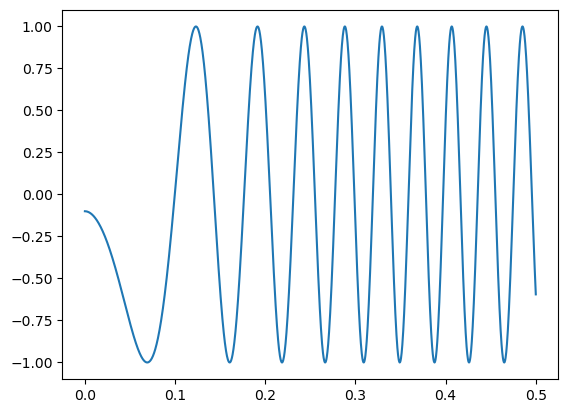

In [62]:
x = np.arange(0, 4000)
k = np.fft.rfftfreq(4000, d=1)
# defocus, amp, Cs, B, voltage, k
ctf = _simulate_CTF_curve(
    defocus = 0.5e4, # defocus in Angstrom
    amp = 0.1, # phase shift in radians
    Cs = 2.7e7, # spherical aberration in Angstrom
    B = 0, # B-factor in Angstrom^2
    voltage = 300e3, # voltage in V
    k = k # spatial frequency in 1/Angstrom
)

fig, ax = plt.subplots()
ax.plot(k, ctf)